# Tugas Besar Tahap 2 Classification <br>
# Nama Anggota Kelompok : <br>
 **1. Anang Furkon Rifai - 1301180229** <br>
 **2. Marcello Rasel Hidayatullah - 1301184019**

# Import Library

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import sklearn as sk
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [62]:
from google.colab import files
file = files.upload()

Saving salju_test.csv to salju_test (1).csv
Saving salju_train.csv to salju_train (1).csv


In [84]:
# Dataset Test
salju_test = pd.read_csv('salju_test.csv') 

# Mengganti nama kolom "BersaljuBesok" menjadi "Class"
salju_test.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

salju_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [85]:
# Dataset Train
salju_train = pd.read_csv('salju_train.csv')

# Mengganti nama kolom 'BersaljuBesok' menjadi 'Class'
salju_train.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

salju_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


# Pre Processing Data

In [86]:
# Mengecek jumlah data pada kolom 'Class' pada data test
salju_test['Class'].value_counts()

No     13824
Yes     3939
Name: Class, dtype: int64

In [87]:
# Mengecek jumlah data pada kolom 'Class' pada data train
salju_train['Class'].value_counts()

Tidak    82701
Ya       23963
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


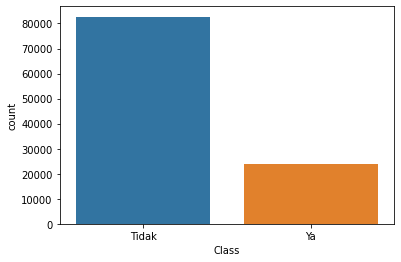

In [88]:
# Memvisualisasi data pada kolom 'Class' pada data train
train_plot = sns.countplot(salju_train['Class'])
train_plot.set_xticklabels(['Tidak','Ya'])
plt.show()

## Pre Processing Data Train

In [89]:
train_0 = salju_train[salju_train['Class'] == 'Tidak']
train_1 = salju_train[salju_train['Class'] == 'Ya']

print("Class 0 :", train_0.shape)
print("Class 1 :", train_1.shape)

Class 0 : (82701, 24)
Class 1 : (23963, 24)


In [90]:
# Oversampling Data
train_count_0, train_count_1 = salju_train['Class'].value_counts()
train_1_over = train_1.sample(train_count_0, replace = True)

salju_train_sampling = pd.concat([train_1_over, train_0], axis=0)

print("Total Class 1 and 0 :", salju_train_sampling['Class'].value_counts())

Total Class 1 and 0 : Tidak    82701
Ya       82701
Name: Class, dtype: int64


In [91]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                       787
SuhuMax                       342
Hujan                        2272
Penguapan                   71254
SinarMatahari               78488
ArahAnginTerkencang         11604
KecepatanAnginTerkencang    11510
ArahAngin9am                10917
ArahAngin3pm                 4793
KecepatanAngin9am            1595
KecepatanAngin3pm            3203
Kelembaban9am                2298
Kelembaban3pm                4499
Tekanan9am                  16295
Tekanan3pm                  16291
Awan9am                     60861
Awan3pm                     64054
Suhu9am                      1220
Suhu3pm                      3396
BersaljuHariIni              2272
Class                           0
dtype: int64

In [92]:
# Mengatasi Missing Values
salju_train_sampling.fillna(salju_train_sampling.median(), inplace=True)                # Nilai Numeric diisi dengan nilai median
salju_train_sampling = salju_train_sampling.fillna(salju_train_sampling.mode().iloc[0]) # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

In [93]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64

In [94]:
# Menentukan Fitur Categorical
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_train_sampling.columns.values.tolist()
for col in features:
    if salju_train_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding Fitur Categorical
for col in categorical_columns:
    if col in salju_train_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_train_sampling[col].astype(str).values))
        salju_train_sampling[col] = enco.transform(list(salju_train_sampling[col].astype(str).values))

In [95]:
salju_train_sampling.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
62608,62609,521,28,8.8,17.1,0.4,2.2,6.2,6,57.0,7,7,24.0,31.0,61.0,50.0,1011.4,1008.2,7.0,4.0,13.9,15.7,0,1
5133,5134,2805,2,22.2,29.6,7.8,7.0,6.8,3,41.0,5,3,20.0,24.0,76.0,59.0,1007.9,1004.7,7.0,8.0,25.1,28.6,1,1
65500,65501,2733,26,12.6,16.4,0.2,4.4,6.8,3,30.0,3,5,13.0,13.0,85.0,90.0,1019.6,1016.7,6.0,6.0,13.0,13.9,0,1
92602,92603,3179,48,21.9,29.0,0.4,5.6,9.6,9,46.0,10,9,20.0,28.0,80.0,61.0,1019.3,1016.5,7.0,6.0,24.9,27.1,0,1
107190,107191,3159,14,17.8,27.4,3.0,4.4,6.8,8,19.0,10,9,6.0,4.0,98.0,55.0,1016.5,1014.2,6.0,6.0,20.0,26.8,1,1


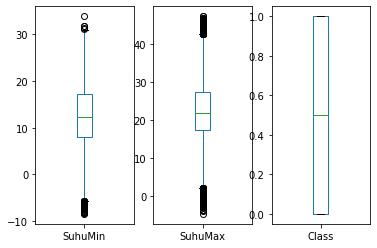

<Figure size 1440x720 with 0 Axes>

In [96]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [97]:
#Metode IQR untuk SuhuMin
Q1=salju_train_sampling['SuhuMin'].quantile(0.25)
Q3=salju_train_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.0
17.2
9.2
-5.799999999999999 31.0


In [98]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']> Lower_Whisker]

In [99]:
#Metode IQR untuk SuhuMax
Q1=salju_train_sampling['SuhuMax'].quantile(0.25)
Q3=salju_train_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.2
27.4
10.2
1.9000000000000004 42.699999999999996


In [100]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']> Lower_Whisker]

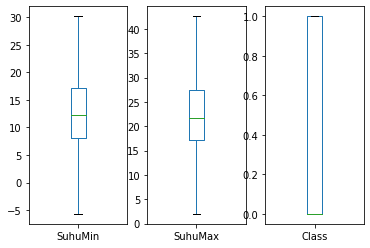

<Figure size 1440x720 with 0 Axes>

In [101]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [102]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_train_sampling)

id [ 62609   5134  65501 ... 109093 109094 109095]
Tanggal [ 521 2805 2733 ... 3010 1002 3153]
KodeLokasi [28  2 26 48 14 45 31 21 39 25 16 33  8  7  9 11 42  4 23 37  1 41  3 47
 20 15 34  0 27 46 22 38 17 10 18 24 35 19 30 13 12  5  6 32 29 44 36 40
 43]
SuhuMin [ 8.8 22.2 12.6 21.9 17.8 26.6 19.8 20.5 12.1 12.9 21.1 11.4 13.5 10.9
 25.  14.9 19.6 15.2 13.7 20.4  3.9  6.1 13.9 16.1 10.7 13.  22.3 19.2
 20.1  5.5 16.3 12.3  9.2 16.7  3.3  3.6 14.2 12.2 23.2 17.2  4.4 14.7
  4.8 12.8  4.6 10.5 14.1 12.5  8.2 18.6 18.1  4.3 21.5 19.5  8.6  5.4
 17.1  7.4 11.6  6.8 24.7 25.5 23.3 19.3 15.5 24.2 16.9  5.6 24.  10.2
  6.  15.8 10.3 13.8 15.1 27.4 21.7  8.3  1.1 21.6  6.9 23.4 17.6 17.5
  4.   7.8 13.6  1.3 14.6 24.3 11.9 11.8 20.2  1.8 15.7 15.6  4.7  9.1
  3.  18.2 18.9  5.2  1.4 24.5  9.5  9.6  7.6 13.4  7.1  6.7 16.   9.7
 -1.8 28.  23.5 -3.5 10.   9.4  1.7 26.5 12.7  3.5 14.5 21.3 24.1 14.4
  0.7 18.3 18.4 20.6 21.4  5.3 24.8  7.2  4.2  9.8 17.3 16.4 22.7 16.5
 14.3 10.6  5.1  6.4  7.3

In [103]:
# Mengecek type atribut
print(salju_train_sampling.dtypes)

id                            int64
Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object


## Pre Processing Data Test

In [106]:
test_0 = salju_test[salju_test['Class'] == 'No']
test_1 = salju_test[salju_test['Class'] == 'Yes']

print("Class 0 :", test_0.shape)
print("Class 1 :", test_1.shape)

Class 0 : (13824, 23)
Class 1 : (3939, 23)


In [107]:
# Oversampling Data
test_count_0, test_count_1 = salju_test['Class'].value_counts()
test_1_over = test_1.sample(test_count_0, replace = True)

salju_test_sampling = pd.concat([test_1_over, test_0], axis=0)

print("Total Class 1 and 0 :", salju_test_sampling['Class'].value_counts())

Total Class 1 and 0 : No     13824
Yes    13824
Name: Class, dtype: int64


In [108]:
# Mengecek missing values
salju_test_sampling.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                       109
SuhuMax                        59
Hujan                         335
Penguapan                   11869
SinarMatahari               13040
ArahAnginTerkencang          1838
KecepatanAnginTerkencang     1829
ArahAngin9am                 1797
ArahAngin3pm                  717
KecepatanAngin9am             252
KecepatanAngin3pm             480
Kelembaban9am                 399
Kelembaban3pm                 678
Tekanan9am                   2644
Tekanan3pm                   2639
Awan9am                     10189
Awan3pm                     10645
Suhu9am                       236
Suhu3pm                       528
BersaljuHariIni               335
Class                           0
dtype: int64

In [111]:
# Mengatasi Missing Values
salju_test_sampling.fillna(salju_test_sampling.median(), inplace=True)                # Nilai Numeric diisi dengan nilai median
salju_test_sampling = salju_test_sampling.fillna(salju_test_sampling.mode().iloc[0]) # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

In [112]:
salju_test_sampling.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64

In [109]:
# Menentukan Fitur Categorical
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_test_sampling.columns.values.tolist()
for col in features:
    if salju_test_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding Fitur Categorical
for col in categorical_columns:
    if col in salju_test_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_test_sampling[col].astype(str).values))
        salju_test_sampling[col] = enco.transform(list(salju_test_sampling[col].astype(str).values))

In [113]:
salju_test_sampling.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
4404,1999,11,12.2,19.0,33.6,4.4,1.2,9,65.0,8,10,17.0,30.0,92.0,68.0,1013.7,1014.1,8.0,7.0,14.6,17.5,1,1
12085,1217,12,2.6,20.9,0.0,4.4,6.9,3,28.0,9,3,4.0,13.0,80.0,37.0,1021.2,1015.2,6.0,6.0,11.3,20.6,0,1
5865,1196,4,6.6,14.0,26.8,2.2,6.9,3,46.0,3,6,7.0,19.0,87.0,73.0,1007.0,1004.8,1.0,6.0,9.2,13.0,1,1
10303,1568,41,25.5,38.5,0.0,8.0,6.9,11,35.0,14,15,11.0,19.0,62.0,58.0,1010.8,1007.1,5.0,6.0,30.5,20.2,0,1
6981,1908,9,10.0,17.1,2.6,4.4,6.9,14,57.0,14,13,28.0,35.0,80.0,89.0,1014.5,1014.1,8.0,8.0,15.6,14.9,1,1


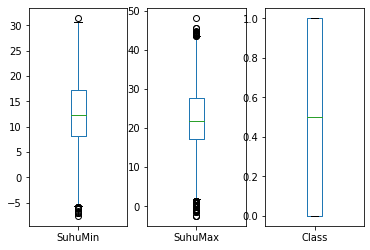

<Figure size 1440x720 with 0 Axes>

In [114]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [115]:
#Metode IQR untuk SuhuMin
Q1=salju_test_sampling['SuhuMin'].quantile(0.25)
Q3=salju_test_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.1
17.3
9.200000000000001
-5.700000000000001 31.1


In [116]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']> Lower_Whisker]

In [117]:
#Metode IQR untuk SuhuMax
Q1=salju_test_sampling['SuhuMax'].quantile(0.25)
Q3=salju_test_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.3
27.8
10.5
1.5500000000000007 43.55


In [118]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']> Lower_Whisker]

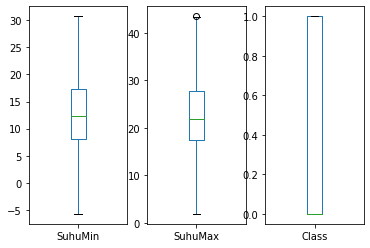

<Figure size 1440x720 with 0 Axes>

In [119]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [120]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_test_sampling)

Tanggal [1999 1217 1196 ... 1358 1138  435]
KodeLokasi [11 12  4 41  9 24 22  3 46 20 38  6 25  8 18 21 19 40 37 47 48 45 31 36
 17 39 35 29 33 34 14 27 10  0 13 26 44 16  7 15  2 23 28 32  1 42 30  5
 43]
SuhuMin [12.2  2.6  6.6 25.5 10.  10.1 21.  19.7  9.3  1.3  6.2 14.2  9.9  3.9
 17.6 15.5 19.9 17.3 18.7 18.9 23.7 15.4 24.2 26.  14.  13.8 23.8 12.3
  7.5 13.4 13.1  9.   8.5 15.9  9.2  5.8  7.8  0.4 12.1  6.8  9.1 12.9
 15.3 20.9 17.1  3.6 13.3 23.1 16.  10.8  2.7 11.7 25.2 21.4 26.6 13.6
 12.7  3.5  7.9 11.3 21.2 13.5  8.2 10.7 23.6 22.2  9.4 22.8 27.9  9.6
 17.4 16.5  7.1 13.  23.2 12.8 12.5 18.3 11.6 11.2 10.4 25.9 22.1  8.3
  4.5 21.6  9.8 19.8  7.2 14.7 21.5 16.2  5.3 13.7 21.1  6.9 22.  11.1
 17.  19.2 11.4 25.   7.   6.7 11.9  8.4  9.7 14.8 15.7 18.6 19.   4.1
  5.5 16.9 11.8 27.8 17.9  9.5 17.2 18.1 11.  12.  -2.6  5.6  3.4  7.6
 20.8 18.  20.6 10.9 16.4  4.4 20.4  8.9 25.4  8.6 16.3  4.8 20.1 26.2
 20.   8.1 24.8 22.9  7.7  5.7 14.6 18.5  3.7 19.6 15.6  1.5  2.5 19.5
 14.5

In [122]:
# Mengecek type atribut
print(salju_test_sampling.dtypes)

Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object
